In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from scipy import stats
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import PowerTransformer 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score , accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv("C:/Users/Shahbaz Baig/Desktop/Titanic-Dataset.csv" , usecols = ['Age' , 'Fare' , 'Survived'])

In [4]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [5]:
df['Age'].isnull().sum()

177

In [6]:
x_train , x_test , y_train , y_test = train_test_split(df.drop(columns = ['Survived']),df['Survived'],test_size = 0.2)

In [7]:
x_train['Imputed_Age'] = x_train['Age']
x_test['Imputed_Age'] = x_test['Age']

# **Random Imputation of Values**

In [9]:
x_train['Imputed_Age'][x_train['Imputed_Age'].isnull()] = x_train['Age'].dropna().sample(x_train['Imputed_Age'].isnull().sum()).values
x_test['Imputed_Age'][x_test['Imputed_Age'].isnull()] = x_test['Age'].dropna().sample(x_test['Imputed_Age'].isnull().sum()).values

C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_12244\987630062.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Imputed_Age'][x_train['Imputed_Age'].isnull()] = x_train['Age'].dropna().sample(x_train['Imputed_Age'].isnull().s

In [10]:
x_train

,Age,Fare,Imputed_Age
765,51.00,77.9583,51.00
206,32.00,15.8500,32.00
768,NaN,24.1500,31.00
305,0.92,151.5500,0.92
475,NaN,52.0000,21.00
...,...,...,...
714,52.00,13.0000,52.00
198,NaN,7.7500,27.00
643,NaN,56.4958,44.00
677,18.00,9.8417,18.00


C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_12244\3613620301.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label = "Original" , hist = False)
C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_12244\3613620301.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

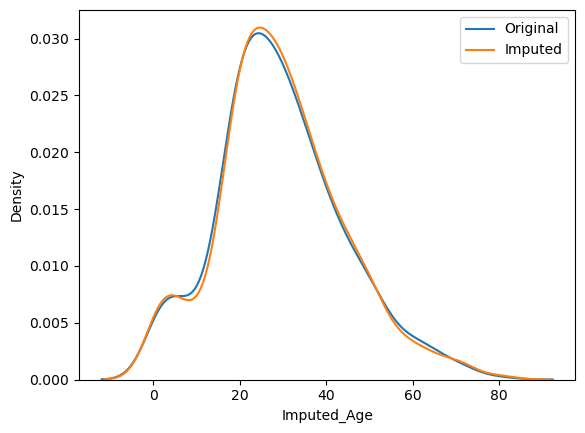

In [11]:
sns.distplot(x_train['Age'],label = "Original" , hist = False)
sns.distplot(x_train['Imputed_Age'],label = "Imputed" , hist = False)
plt.legend()
plt.show()

# variance dont change while covariance changes
try you own

<Axes: >

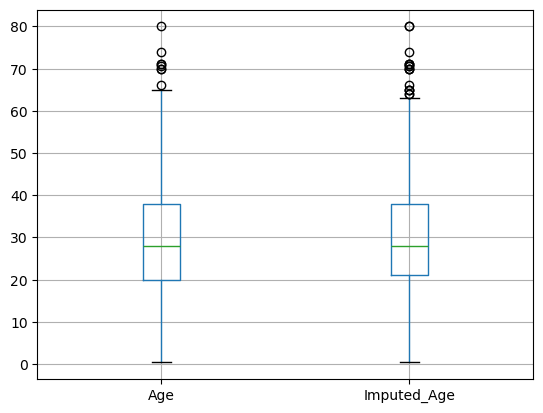

In [13]:
x_train[['Age', 'Imputed_Age']].boxplot()  # same no of outliers

In [14]:
observation['Fare'] = float(observation['Fare'])
sampled_value = x_train['Age'].dropna().sample( 1 , random_state = int(observation['Fare']))

NameError: name 'observation' is not defined

In [26]:
x_train


,Age,Fare,Imputed_Age
765,51.00,77.9583,51.00
206,32.00,15.8500,32.00
768,NaN,24.1500,31.00
305,0.92,151.5500,0.92
475,NaN,52.0000,21.00
...,...,...,...
714,52.00,13.0000,52.00
198,NaN,7.7500,27.00
643,NaN,56.4958,44.00
677,18.00,9.8417,18.00


In [28]:
df1 = pd.read_csv("C:/Users/Shahbaz Baig/Desktop/train.csv" , usecols=['GarageQual' , 'FireplaceQu' , 'SalePrice']) 

In [30]:
df1.isnull().mean() *100


FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [32]:
x = df1
y = df1['SalePrice']

In [34]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

In [36]:
x_train['Garage_Imputed'] = x_train['GarageQual']
x_test['Garage_Imputed'] = x_test['GarageQual']
x_train['Fire_Imputed'] = x_train['FireplaceQu']
x_test['Fire_Imputed'] = x_test['FireplaceQu']

In [38]:
x_train

,FireplaceQu,GarageQual,SalePrice,Garage_Imputed,Fire_Imputed
289,NaN,TA,153575,TA,NaN
1072,TA,TA,91500,TA,TA
1399,Gd,Fa,137450,Fa,Gd
378,Ex,TA,394432,TA,Ex
667,Fa,TA,193500,TA,Fa
...,...,...,...,...,...
1116,TA,TA,184100,TA,TA
484,NaN,TA,132500,TA,NaN
301,TA,TA,267000,TA,TA
463,Gd,TA,188700,TA,Gd


In [45]:
x_train['Garage_Imputed'][x_train['Garage_Imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['Garage_Imputed'].isnull().sum()).values
x_test['Garage_Imputed'][x_test['Garage_Imputed'].isnull()] = x_test['GarageQual'].dropna().sample(x_test['Garage_Imputed'].isnull().sum()).values
x_train['Fire_Imputed'][x_train['Fire_Imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_train['Fire_Imputed'].isnull().sum()).values
x_test['Fire_Imputed'][x_test['Fire_Imputed'].isnull()] = x_test['FireplaceQu'].dropna().sample(x_test['Fire_Imputed'].isnull().sum(), replace=True).values

C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_12244\2997265240.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Garage_Imputed'][x_train['Garage_Imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['Garage_Imp

In [47]:
x_train

,FireplaceQu,GarageQual,SalePrice,Garage_Imputed,Fire_Imputed
289,NaN,TA,153575,TA,TA
1072,TA,TA,91500,TA,TA
1399,Gd,Fa,137450,Fa,Gd
378,Ex,TA,394432,TA,Ex
667,Fa,TA,193500,TA,Fa
...,...,...,...,...,...
1116,TA,TA,184100,TA,TA
484,NaN,TA,132500,TA,TA
301,TA,TA,267000,TA,TA
463,Gd,TA,188700,TA,Gd


# **Frequency Check**

In [54]:
tmp = pd.concat(
    [
        x_train['GarageQual'].value_counts() / len(x_train['GarageQual'].dropna()),
        x_train['Garage_Imputed'].value_counts() / len(x_train)
    ],axis = 1
)
tmp.columns = ['Original' , 'Imputed']


In [56]:
tmp



,Original,Imputed
TA,0.950406,0.951199
Fa,0.033363,0.032534
Gd,0.011722,0.011130
Ex,0.002705,0.002568
Po,0.001803,0.002568


In [60]:
tmp1 = pd.concat(
    [
        x_train['FireplaceQu'].value_counts() / len(x_train['FireplaceQu'].dropna()),
        x_train['Fire_Imputed'].value_counts() / len(x_train)
    ],axis = 1
)
tmp.columns = ['Original' , 'Imputed']

In [62]:
tmp1
x_train['FireplaceQu'].dropna().unique()


array(['TA', 'Gd', 'Ex', 'Fa', 'Po'], dtype=object)

C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_12244\1397471593.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu'] == cat]['SalePrice'] , hist = False , label = cat)
C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_12244\1397471593.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de441

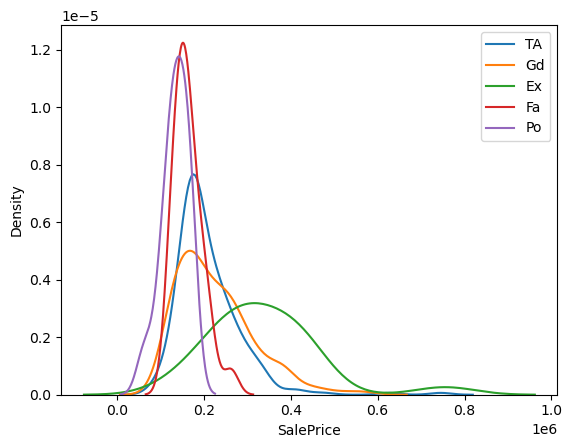

In [66]:
for cat in x_train['FireplaceQu'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu'] == cat]['SalePrice'] , hist = False , label = cat)
plt.legend()
plt.show()

# **Missing Indicator**

# you can use Missing Indicator class of sklearn for this or can use parameter of add_indicator=True in Simple Imputer 

In [70]:
df = pd.read_csv("C:/Users/Shahbaz Baig/Desktop/Titanic-Dataset.csv" , usecols = ['Age' , 'Fare' , 'Survived'])

In [72]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [102]:
x_train , x_test , y_train , y_test = train_test_split(df.drop(columns = ['Survived']),df['Survived'],test_size = 0.2)

In [100]:
from sklearn.impute import MissingIndicator,SimpleImputer
mi = MissingIndicator()
mi.fit(x_train)

MissingIndicator()

In [82]:
x_train_mi = mi.transform(x_train)
x_test_mi = mi.transform(x_test)

In [90]:
x_train_mi[1:9]

array([[False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True]])

In [92]:
x_train['Missing_NA'] = x_train_mi
x_test['Missing_NA'] = x_test_mi

In [94]:
x_train

,Age,Fare,Missing_NA
697,NaN,7.7333,True
548,33.0,20.5250,False
485,NaN,25.4667,True
407,3.0,18.7500,False
868,NaN,9.5000,True
...,...,...,...
356,22.0,55.0000,False
571,53.0,51.4792,False
59,11.0,46.9000,False
379,19.0,7.7750,False


In [108]:
si = SimpleImputer(add_indicator=True)

In [110]:
x_train = si.fit_transform(x_train)
x_test = si.transform(x_test)

In [122]:
x_train = pd.DataFrame(x_train)
x_train.columns = ['Age' , 'Fare' , 'Age_NA']

In [124]:
x_train

,Age,Fare,Age_NA
0,30.000000,56.9292,0.0
1,29.654825,7.2250,1.0
2,34.000000,13.0000,0.0
3,1.000000,37.0042,0.0
4,30.000000,21.0000,0.0
...,...,...,...
707,24.000000,83.1583,0.0
708,15.000000,8.0292,0.0
709,30.000000,16.1000,0.0
710,24.000000,13.0000,0.0


# Automatically select the value

# **using Grid Search**

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


In [143]:
numerical_transformer = Pipeline(steps = [
    ('Impute' , SimpleImputer(strategy='median')),
    ('Scaling' , StandardScaler())
])
numerical_feature = ['Age' , 'Fare']
preprocess_num = ColumnTransformer(transformers=[
    ('num' , numerical_transformer , numerical_feature)
])

In [145]:
preprocess_num

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('Impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('Scaling',
                                                  StandardScaler())]),
                                 ['Age', 'Fare'])])